Este colab fue desarrollado por Arnold Charry Armero.

# Regresión Logística

En problemas de clasificación es donde algoritmos como el de Regresión Lineal no aplican debido a que no pueden mantener la estabilidad estadística de un valor u otro y, además, son muy sensibles a datos atípicos. Por lo anterior, se pensó en la Regresión Logística, la cual por medio de sus procedimientos matemáticos permite etiquetar observaciones con múltiples características de manera binaria. En otras palabras, analiza varias variables independientes para llegar a una conclusión binaria, ya sea sí o no, o éxito o fracaso. Este modelo de aprendizaje supervisado tiene aplicaciones en la ciencia de datos, la epidemiología, la biología, la salud y la investigación social.


La Regresión Logística maximiza la función de Máxima Verosimilitud para conocer los parámetros correctos que mejor explican los datos. Para empezar, se comienza con la función logística, famosa por describir el crecimiento de poblaciones y de la cual partió todo. Matemáticamente se modela de la siguiente manera,

$$ f(x)=\frac{1}{1+e^{-x}} $$

Que expresándolo como modelo de Machine Learning a diversas características se vería de la siguiente manera matemáticamente,

$$  \hat{y} =\frac{1}{1+e^{-(\beta_{0}+\sum_{i=1}^{n}\beta_{i}x_{i})}} $$

Obteniendo la siguiente función de costo,

$$ \text{max}\sum_{i=1}^{m}y_{i}\log (\hat{y}) + (1-y_{i}) \log (1-\hat{y}) $$


Ahora se continúa con la implementación en código,

In [ ]:
# Se importan las librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Cargamos la base de datos,

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning/Bases de Datos/transfusion.csv')

Para la Regresión Logística cuando se tienen variables categóricas, se deben de crear $ n - 1 $ variables que correspondan a las categorías que se van a representar. Para ello, se deben crear variables dummy para las variables categóricas.

In [ ]:
df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


Primero se analiza la base de datos,

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            748 non-null    int64
 1   Frequency (times)                           748 non-null    int64
 2   Monetary (c.c. blood)                       748 non-null    int64
 3   Time (months)                               748 non-null    int64
 4   whether he/she donated blood in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [ ]:
df.describe()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


Se contabiliza la cantidad de personas que compraron el producto,

In [ ]:
df = df.rename(columns = {'whether he/she donated blood in March 2007': 'Donor (Yes/No)'})

In [ ]:
df.iloc[:, -1].value_counts()

,count
Donor (Yes/No),
0,570
1,178


## Preprocesamiento de Datos

In [ ]:
# Obtenemos las características
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [ ]:
# Se detectan las columnas categóricas
cat_cols = df.select_dtypes(include=['object', 'category']).columns
cat_indices = [df.columns.get_loc(col) for col in cat_cols]

# Se detectan las columnas numéricas
num_indices = [i for i in range(df.shape[1] - 1) if i not in cat_indices]

# Se crea el transformador
ct = ColumnTransformer(
    transformers=[('num', StandardScaler(), num_indices),
                  ('encoder', OneHotEncoder(drop='first',sparse_output=False, dtype=int), cat_indices)],
                    remainder='passthrough')

## Separación en Base de datos de Entrenamiento y Prueba

In [ ]:
# Se divide la base de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Escalado de Datos

In [ ]:
# Se escalan las variables
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

In [ ]:
# Visualizar el array X_train
print(X_train)

[[-0.70397737  0.62572681  0.62572681  0.14236965]
 [-0.83283518 -0.07499347 -0.07499347 -0.91624507]
 [-0.96169299 -0.77571376 -0.77571376 -1.32340458]
 ...
 [-0.31740394  0.97608695  0.97608695  2.21888315]
 [-0.83283518  0.45054674  0.45054674  0.63096107]
 [ 0.84231636 -0.25017355 -0.25017355 -0.0612101 ]]


## Entrenamiento del Modelo

Ahora vamos con el modelo de Regresión Logística con sus predicciones,

In [ ]:
log_model = LogisticRegression()

In [ ]:
log_model.fit(X_train,y_train)

LogisticRegression()

Obteniendo los coeficientes del modelo,

In [ ]:
print('Coeficientes: ', log_model.coef_)
print('Intercepción: ', log_model.intercept_)

Coeficientes:  [[-0.73612847  0.34549401  0.34549401 -0.56425534]]
Intercepción:  [-1.45754505]


Obteniendo los coeficientes en escala normal para su interpretación,

In [ ]:
# Desescalado
scaler = ct.named_transformers_['num']

coef_scaled = log_model.coef_[0]
n_num = len(num_indices)

# Se separan coeficientes
coef_num_scaled = coef_scaled[:n_num]
coef_cat = coef_scaled[n_num:]

# Desescalar numéricos
coef_num_original = coef_num_scaled / scaler.scale_
intercept_original = log_model.intercept_[0] - np.sum(scaler.mean_ * coef_num_scaled / scaler.scale_)

# Se Obtienen nombres directamente del ColumnTransformer
feature_names = ct.get_feature_names_out()
coef_original = np.concatenate([coef_num_original, coef_cat])

coef_table = pd.DataFrame({
    'Variable': feature_names,
    'Coeficiente (original)': coef_original})

# Resultados
print('\n--- Coeficientes en escala original ---')
print(coef_table)
print('\nIntercepto en escala original:', intercept_original)


--- Coeficientes en escala original ---
  Variable  Coeficiente (original)
0  num__x0               -0.094856
1  num__x1                0.060524
2  num__x2                0.000242
3  num__x3               -0.022974

Intercepto en escala original: -0.42427342116300437


Realizando una predicción,

In [ ]:
# Se debe de hacer en el orden original
print("Predicción:", log_model.predict(ct.transform([[0, 13, 6000, 77]]))[0])

Predicción: 1


In [ ]:
# Obtenemos las predicciones
y_pred = log_model.predict(X_test)
print(y_pred.reshape(len(y_pred),1))

[[0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]


## Rendimiento del Modelo

In [ ]:
# Obteniendo la precisión del modelo
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.7333333333333333


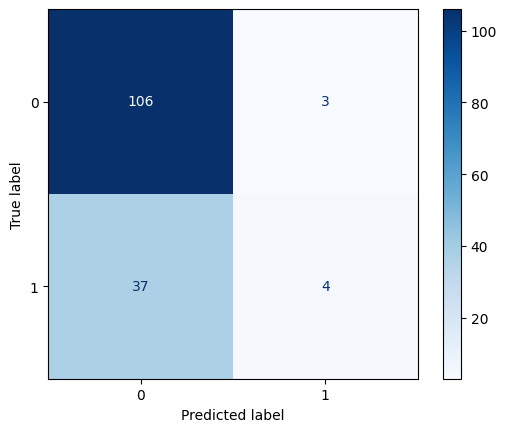

In [ ]:
# Visualizando la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = [0, 1])
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.show()

In [ ]:
# Obteniendo el reporte de clasificación
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.97      0.84       109
           1       0.57      0.10      0.17        41

    accuracy                           0.73       150
   macro avg       0.66      0.54      0.50       150
weighted avg       0.69      0.73      0.66       150



## Referencias


*  Blood transfusion dataset. (2022, September 30). Kaggle. https://www.kaggle.com/datasets/whenamancodes/blood-transfusion-dataset
*   Jacinto, V. R. (2024). Machine learning: Fundamentos, algoritmos y aplicaciones para los negocios, industria y finanzas. Ediciones Díaz de Santos.
*   James, G., Witten, D., Hastie, T., & Tibshirani, R. (2021). An Introduction to Statistical Learning: with Applications in R. https://link.springer.com/content/pdf/10.1007/978-1-0716-1418-1.pdf
